Attrition_Flag
Customer_Age
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


<Axes: >

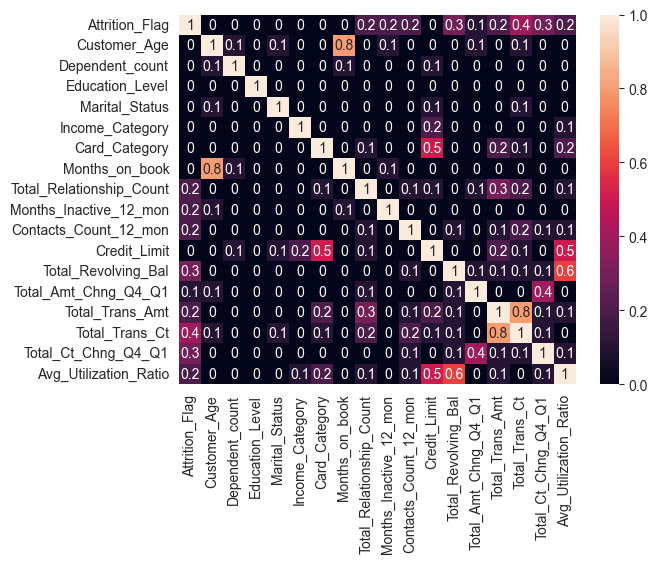

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

PATH = "credits.csv"
dataset = pd.read_csv(PATH)


odd_columns = ["CLIENTNUM",
               "Gender",
               "Avg_Open_To_Buy",
               "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
               "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

for column in odd_columns:
    dataset = dataset.drop(column, axis=1)

for column in dataset:
    print(f"{column}")
    if type(dataset[column][0]) is str:
        dataset[column] = pd.factorize(dataset[column])[0]

sns.heatmap(
    round(abs(dataset.corr()), 1,),
    annot=True,
)


In [2]:
result_column = "Attrition_Flag"

train_input, test_input, train_output, test_output = train_test_split(
 dataset.drop(result_column, axis=1),
 dataset[result_column],
 test_size=0.2
)

model = GaussianNB()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)
print(f"Точность модели на тестовом участке = {accuracy}")


Точность модели на тестовом участке = 0.8815399802566634
